In [1]:
from google.colab import files
uploaded = files.upload()


Saving sales_data.csv to sales_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace filename if different
df = pd.read_csv("sales_data.csv")

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

df.head()


,Date,Product,Category,Units_Sold,Price_Per_Unit,Total_Sale_Value,Commission_Rate,Commission_Earned
0,2024-12-01,Earphone,Audio,1,516,516,0.1,51.6
1,2024-12-01,Data Cable,Accessories,1,274,274,0.1,27.4
2,2024-12-03,Earphone,Audio,1,779,779,0.1,77.9
3,2024-12-04,Earphone,Audio,1,827,827,0.1,82.7
4,2024-12-05,Earphone,Audio,1,614,614,0.1,61.4


In [3]:
print("Dataset Info:")
df.info()
print("\nStatistical Summary:")
df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               19 non-null     datetime64[ns]
 1   Product            19 non-null     object        
 2   Category           19 non-null     object        
 3   Units_Sold         19 non-null     int64         
 4   Price_Per_Unit     19 non-null     int64         
 5   Total_Sale_Value   19 non-null     int64         
 6   Commission_Rate    19 non-null     float64       
 7   Commission_Earned  19 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.3+ KB

Statistical Summary:


,Date,Units_Sold,Price_Per_Unit,Total_Sale_Value,Commission_Rate,Commission_Earned
count,19,19.0,19.000000,19.000000,1.900000e+01,19.000000
mean,2024-12-10 17:41:03.157894656,1.0,760.157895,760.157895,1.000000e-01,76.015789
min,2024-12-01 00:00:00,1.0,227.000000,227.000000,1.000000e-01,22.700000
25%,2024-12-06 00:00:00,1.0,409.000000,409.000000,1.000000e-01,40.900000
50%,2024-12-09 00:00:00,1.0,543.000000,543.000000,1.000000e-01,54.300000
75%,2024-12-14 00:00:00,1.0,803.000000,803.000000,1.000000e-01,80.300000
max,2024-12-29 00:00:00,1.0,3300.000000,3300.000000,1.000000e-01,330.000000
std,NaN,0.0,697.079006,697.079006,2.851614e-17,69.707901


In [4]:
total_sales = df['Total_Sale_Value'].sum()
total_commission = df['Commission_Earned'].sum()

print(f"Total Sales Value: ₹{total_sales}")
print(f"Total Commission Earned: ₹{total_commission}")


Total Sales Value: ₹14443
Total Commission Earned: ₹1444.3000000000002



Sales by Product:
Product
Dashcam       3300
Data Cable    1361
Earphone      6023
Mouse         3759
Name: Total_Sale_Value, dtype: int64


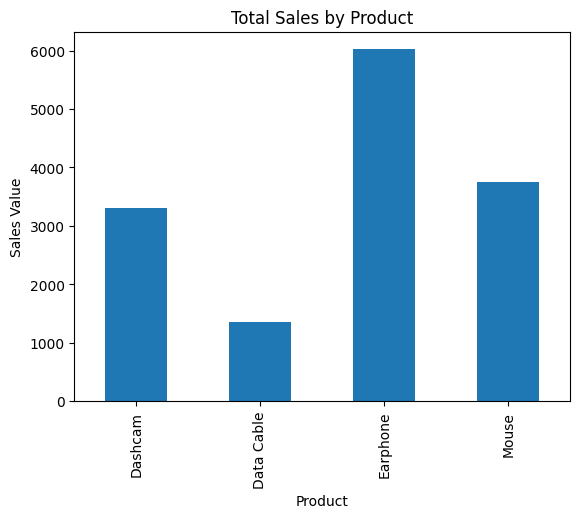

In [5]:
sales_by_product = df.groupby('Product')['Total_Sale_Value'].sum()
print("\nSales by Product:")
print(sales_by_product)
sales_by_product.plot(kind='bar', title='Total Sales by Product')
plt.ylabel("Sales Value")
plt.show()



Sales by Category:
Category
Accessories    5120
Audio          6023
Electronics    3300
Name: Total_Sale_Value, dtype: int64


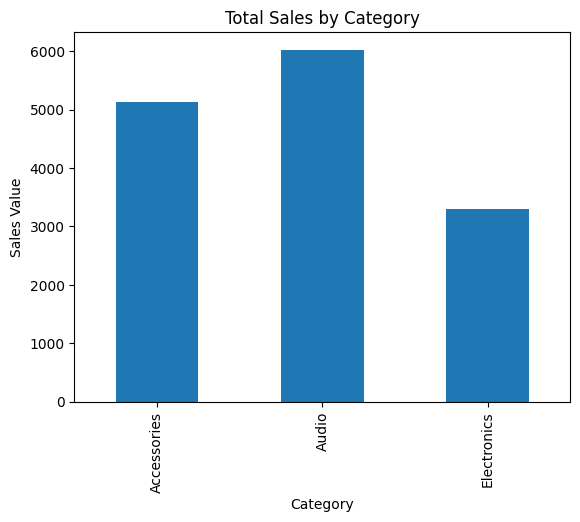

In [6]:
sales_by_category = df.groupby('Category')['Total_Sale_Value'].sum()
print("\nSales by Category:")
print(sales_by_category)
sales_by_category.plot(kind='bar', title='Total Sales by Category')
plt.ylabel("Sales Value")
plt.show()



Commission by Category:
Category
Accessories    512.0
Audio          602.3
Electronics    330.0
Name: Commission_Earned, dtype: float64


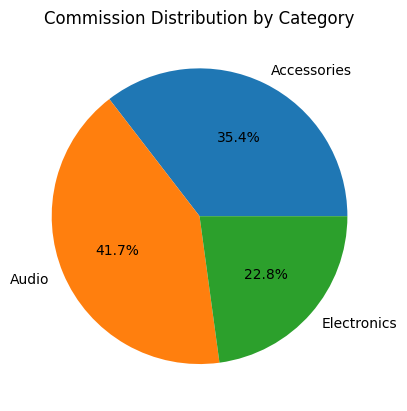

In [7]:
commission_by_category = df.groupby('Category')['Commission_Earned'].sum()
print("\nCommission by Category:")
print(commission_by_category)
commission_by_category.plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Commission Distribution by Category'
)
plt.ylabel("")
plt.show()



Daily Sales:
Date
2024-12-01     790
2024-12-03     779
2024-12-04     827
2024-12-05     614
2024-12-07     810
2024-12-08     867
2024-12-09    1250
2024-12-10     514
2024-12-11     543
2024-12-13    1506
2024-12-15    3300
2024-12-17    1307
2024-12-18     529
2024-12-25     514
2024-12-29     293
Name: Total_Sale_Value, dtype: int64


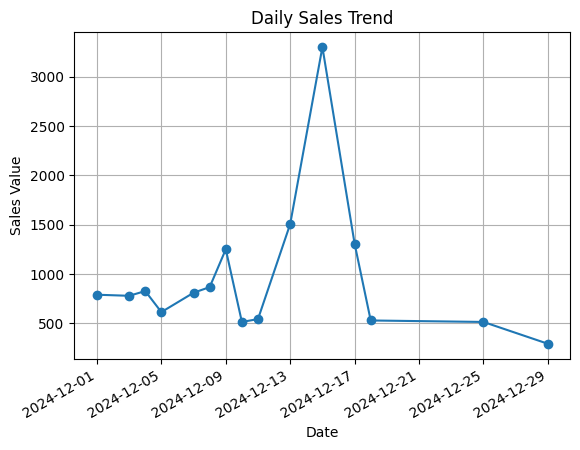

In [8]:
daily_sales = df.groupby('Date')['Total_Sale_Value'].sum()
print("\nDaily Sales:")
print(daily_sales)
daily_sales.plot(marker='o', title='Daily Sales Trend')
plt.ylabel("Sales Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()


In [9]:
best_product = sales_by_product.idxmax()
worst_product = sales_by_product.idxmin()

print(f"Best Selling Product: {best_product}")
print(f"Worst Selling Product: {worst_product}")


Best Selling Product: Earphone
Worst Selling Product: Data Cable



Average Price per Product:
Product
Dashcam       3300.0
Data Cable     272.2
Earphone       602.3
Mouse         1253.0
Name: Price_Per_Unit, dtype: float64


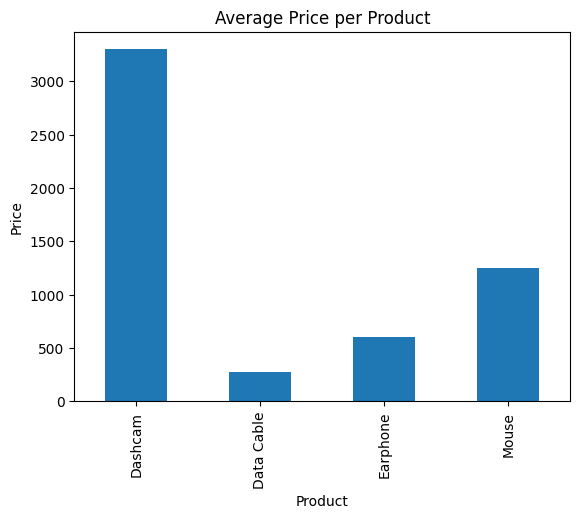

In [10]:
avg_price = df.groupby('Product')['Price_Per_Unit'].mean()
print("\nAverage Price per Product:")
print(avg_price)
avg_price.plot(kind='bar', title='Average Price per Product')
plt.ylabel("Price")
plt.show()


In [11]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful